In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [1]:
import numpy as np

In [38]:
import qnm

In [39]:
import phenom

In [40]:
def final_mass(eta):
    mtot = 1.
    return (1. - phenom.remnant.EradRational0815(eta, 0, 0)) * mtot

In [42]:
def final_spin(eta):
    return phenom.remnant.FinalSpin0815(eta, 0, 0)

In [43]:
final_spin(0.25)

0.6864170524001022

In [264]:
final_mass(0.25)

0.9516120942660409

In [265]:
grav_220 = qnm.modes_cache(s=-2,l=2,m=2,n=0)
omega, _, _ = grav_220(a=final_spin(0.25))
print(omega/final_mass(0.25))

(0.5534656465229616-0.08542339187414537j)


In [266]:
def get_qnm(eta, l, m, n):
    grav_lmn = qnm.modes_cache(s=-2,l=l,m=m,n=n)
    omega_complex, _, _ = grav_lmn(a=final_spin(eta))
    omega_complex = omega_complex/final_mass(eta)
    omega = np.real(omega_complex)
    tau = -np.imag(omega_complex)
    return omega, 1./tau

In [267]:
get_qnm(0.25, 2,2,0)

(0.5534656465229616, 11.70639538024086)

In [268]:
np.array([1.j], dtype=np.complex128).dtype

dtype('complex128')

In [396]:
def hqnm(t, t0, Almn, omega_lmn, tau_lmn):
    """
    Almn, omega_lmn, tau_lmn are lists
    Almn is complex
    returns complex array
    """
    h = np.zeros(len(t), dtype=np.complex128)
    
    for (amp, omega_rd, tau_rd) in zip(Almn, omega_lmn, tau_lmn):

        h += amp*np.exp(-(t-t0)/tau_rd)*np.exp(1.j * omega_rd * t)

    return h

In [413]:
def hqnm_2(t, t0, Almn, philmn, omega_lmn, tau_lmn):
    """
    Almn, omega_lmn, tau_lmn are lists
    Almn is real and philmn is real
    returns complex array
    """
    h = np.zeros(len(t), dtype=np.complex128)
    
    for (amp, phi, omega_rd, tau_rd) in zip(Almn, philmn, omega_lmn, tau_lmn):

        h += amp*np.exp(-(t-t0)/tau_rd)*np.exp(1.j * (omega_rd * t + phi))

    return h

In [398]:
def amp_lmn_fit(eta, l, m, n):
    """
    fits from 10M
    """
    
    if (l==2 and m==2 and n==0):
        amp_lmn = 0.0100641 - 0.947873  * (-1.56229 - 0.576686*eta)*eta
        
    elif (l==2 and m==2 and n==1):
        amp_lmn = 0.0480258 - 0.497523 * (0.451224 - 7.30604*eta)*eta
    
    elif (l==3 and m==2 and n==0):    
        amp_lmn = np.sqrt(5.05597e-6 + (0.0152665 - 0.964626*np.exp(-0.884813/eta))**2)
        
    elif (l==3 and m==2 and n==1):
        amp_lmn = np.sqrt(2.03545e-6 + (0.0103279 - 0.72938*np.exp(-0.858463/eta))**2)
        
    return amp_lmn

In [399]:
amp_lmn_fit(0.25, 2,2,0)

0.414441295347375

In [400]:
amp_lmn_fit(0.25, 3,2,0)

0.012938336951448656

In [401]:
def phi_lmn_fit(eta, l, m, n):
    """
    fits from 10M
    """
    
    if (l==2 and m==2 and n==0):
        phi_lmn = 2.08702 + 2.01086 * (-0.58983 - 12.3849 * eta) * eta
        
    elif (l==2 and m==2 and n==1):
        phi_lmn = 4.96286 + 1.54581 * (-2.00045 - 16.4845 * eta) * eta
    
    elif (l==3 and m==2 and n==0):    
        phi_lmn = 4.26223 + 1.91268*np.tanh(39.1805 * (-0.207648 + eta))
        
    elif (l==3 and m==2 and n==1):
        phi_lmn = 3.14451 + 1.79563*np.tanh(41.1303 * (-0.196409 + eta))
        
    return phi_lmn

In [402]:
phi_lmn_fit(0.25,3,2,0)

6.041276053313408

In [403]:
print(amp_lmn_fit(0.25, 2,2,0))
print(amp_lmn_fit(0.25, 2,2,1))
print(amp_lmn_fit(0.25, 3,2,0))
print(amp_lmn_fit(0.25, 3,2,1))

0.414441295347375
0.2190849041445
0.012938336951448656
0.013280523735059772


In [404]:
print(phi_lmn_fit(0.25, 2,2,0))
print(phi_lmn_fit(0.25, 2,2,1))
print(phi_lmn_fit(0.25, 3,2,0))
print(phi_lmn_fit(0.25, 3,2,1))

0.23398486067499968
2.5971620373125
6.041276053313408
4.896944782310612


In [405]:
eta_arr = np.linspace(0.1,0.25, 100)
plt.figure()
plt.plot(eta_arr, phi_lmn_fit(eta_arr, 2,2,0))
plt.plot(eta_arr, phi_lmn_fit(eta_arr, 2,2,1))
plt.plot(eta_arr, phi_lmn_fit(eta_arr, 3,2,0))
plt.plot(eta_arr, phi_lmn_fit(eta_arr, 3,2,1))

plt.figure()
plt.plot(eta_arr, amp_lmn_fit(eta_arr, 2,2,0))
plt.plot(eta_arr, amp_lmn_fit(eta_arr, 2,2,1))
plt.plot(eta_arr, amp_lmn_fit(eta_arr, 3,2,0))
plt.plot(eta_arr, amp_lmn_fit(eta_arr, 3,2,1))

In [406]:
def Alm_fit(eta, l, m, n):
    amp = amp_lmn_fit(eta, l, m ,n)
    phase = phi_lmn_fit(eta, l, m, n)
    return amp*np.exp(1.j*phase)

In [414]:
def amp_phase_fit(eta, l, m, n):
    amp = amp_lmn_fit(eta, l, m ,n)
    phase = phi_lmn_fit(eta, l, m, n)
    return amp, phase

In [407]:
Alm_fit(0.25, 2,2,0)

(0.4031478563654289+0.09609054686684652j)

In [415]:
t = np.linspace(10, 200, 1000)
eta = phenom.eta_from_q(1)
t0 = 10

Almn = [amp_phase_fit(eta, 2,2,0)[0], amp_phase_fit(eta, 2,2,1)[0]]
philmn = [amp_phase_fit(eta, 2,2,0)[1], amp_phase_fit(eta, 2,2,1)[1]]
omega_lmn = [get_qnm(eta, 2, 2, 0)[0], get_qnm(eta, 2, 2, 1)[0]]
tau_lmn = [get_qnm(eta, 2, 2, 0)[1], get_qnm(eta, 2, 2, 1)[1]]
h22 = hqnm_2(t, t0, Almn, philmn, omega_lmn, tau_lmn)

Almn = [amp_phase_fit(eta, 3,2,0)[0], amp_phase_fit(eta, 3,2,1)[0]]
philmn = [amp_phase_fit(eta, 3,2,0)[1], amp_phase_fit(eta, 3,2,1)[1]]
omega_lmn = [get_qnm(eta, 3, 2, 0)[0], get_qnm(eta, 3, 2, 1)[0]]
tau_lmn = [get_qnm(eta, 3, 2, 0)[1], get_qnm(eta, 3, 2, 1)[1]]
h32 = hqnm_2(t, t0, Almn, philmn, omega_lmn, tau_lmn)

In [408]:
t = np.linspace(10, 200, 1000)
eta = phenom.eta_from_q(1)
t0 = 10

Almn = [Alm_fit(eta, 2,2,0), Alm_fit(eta, 2,2,1)]
omega_lmn = [get_qnm(eta, 2, 2, 0)[0], get_qnm(eta, 2, 2, 1)[0]]
tau_lmn = [get_qnm(eta, 2, 2, 0)[1], get_qnm(eta, 2, 2, 1)[1]]
h22 = hqnm(t, t0, Almn, omega_lmn, tau_lmn)

Almn = [Alm_fit(eta, 3,2,0), Alm_fit(eta, 3,2,1)]
omega_lmn = [get_qnm(eta, 3, 2, 0)[0], get_qnm(eta, 3, 2, 1)[0]]
tau_lmn = [get_qnm(eta, 3, 2, 0)[1], get_qnm(eta, 3, 2, 1)[1]]
h32 = hqnm(t, t0, Almn, omega_lmn, tau_lmn)

In [437]:
t = np.linspace(10, 200, 1000)
eta = phenom.eta_from_q(3)
t0 = 10


Almn = Alm_fit(eta, 2,2,0)
omega_rd = get_qnm(eta, 2, 2, 0)[0]
tau_rd = get_qnm(eta, 2, 2, 0)[1]
print("2,2,0")
print("Almn = ", Almn)
print("omega_rd = ", omega_rd)
print("tau_rd = ", tau_rd)
print('\n')
h220 = Almn*np.exp(-(t-t0)/tau_rd)*np.exp(1.j * omega_rd * t)

Almn = Alm_fit(eta, 2,2,1)
omega_rd = get_qnm(eta, 2, 2, 1)[0]
tau_rd = get_qnm(eta, 2, 2, 1)[1]
print("2,2,1")
print("Almn = ", Almn)
print("omega_rd = ", omega_rd)
print("tau_rd = ", tau_rd)
print('\n')
h221 = Almn*np.exp(-(t-t0)/tau_rd)*np.exp(1.j * omega_rd * t)


Almn = Alm_fit(eta, 3,2,0)
omega_rd = get_qnm(eta, 3, 2, 0)[0]
tau_rd = get_qnm(eta, 3, 2, 0)[1]
print("3,2,0")
print("Almn = ", Almn)
print("omega_rd = ", omega_rd)
print("tau_rd = ", tau_rd)
print('\n')
h320 = Almn*np.exp(-(t-t0)/tau_rd)*np.exp(1.j * omega_rd * t)

Almn = Alm_fit(eta, 3,2,1)
omega_rd = get_qnm(eta, 3, 2, 1)[0]
tau_rd = get_qnm(eta, 3, 2, 1)[1]
print("3,2,1")
print("Almn = ", Almn)
print("omega_rd = ", omega_rd)
print("tau_rd = ", tau_rd)
print('\n')
h321 = Almn*np.exp(-(t-t0)/tau_rd)*np.exp(1.j * omega_rd * t)

2,2,0
Almn =  (0.1686487551491511+0.2564576346353574j)
omega_rd =  0.4895008316432136
tau_rd =  11.430107662694763


2,2,1
Almn =  (-0.1258161773918573-0.045301550811596036j)
omega_rd =  0.47329406533945995
tau_rd =  3.7657705698491895


3,2,0
Almn =  (-0.006960685679209135+0.0009670563433287464j)
omega_rd =  0.7255006761094662
tau_rd =  10.966463427150762


3,2,1
Almn =  (-0.002571123797495899+0.0018632731769200653j)
omega_rd =  0.7144839756046597
tau_rd =  3.630712083933688




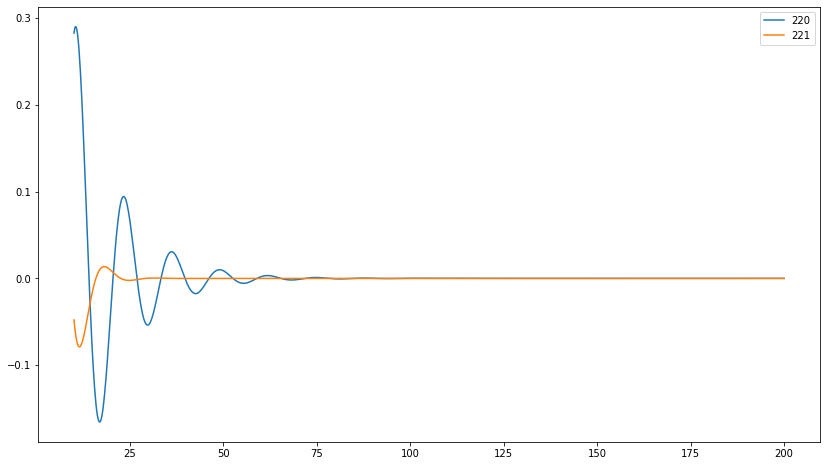

In [432]:
plt.figure(figsize=(14,8))
plt.plot(t, np.real(h220), label='220')
plt.plot(t, np.real(h221), label='221')
plt.legend()

In [433]:
plt.figure(figsize=(14,8))
plt.plot(t, np.real(h320), label='320')
plt.plot(t, np.real(h321), label='321')
plt.legend()

In [441]:
plt.figure(figsize=(14,8))
plt.plot(t, np.real(h220+h221+h320+h321), label='add')
plt.plot(t, np.abs(h220+h221+h320+h321), label='add')
plt.legend()

In [409]:
# t = np.linspace(10, 200, 1000)
# eta = phenom.eta_from_q(1)
# t0 = 10

# print("2,2 mode\n")

# Almn = [Alm_fit(eta, 2,2,0)]
# omega_lmn = [get_qnm(eta, 2, 2, 0)[0]]
# tau_lmn = [get_qnm(eta, 2, 2, 0)[1]]

# print(Almn)
# print(np.abs(Almn))
# print(np.angle(Almn))
# print(omega_lmn)
# print(1./tau_lmn[0])

# h22 = hqnm(t, t0, Almn, omega_lmn, tau_lmn)

# print("\n3,2 mode\n")

# Almn = [Alm_fit(eta, 3,2,0)]
# omega_lmn = [get_qnm(eta, 3, 2, 0)[0]]
# tau_lmn = [get_qnm(eta, 3, 2, 0)[1]]

# print(Almn)
# print(np.abs(Almn))
# print(np.angle(Almn))
# print(omega_lmn)
# print(1./tau_lmn[0])

# h32 = hqnm(t, t0, Almn, omega_lmn, tau_lmn)

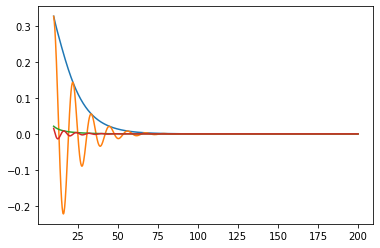

In [416]:
plt.figure()
plt.plot(t, np.abs(h22))
plt.plot(t, np.real(h22))
plt.plot(t, np.abs(h32))
plt.plot(t, np.real(h32))

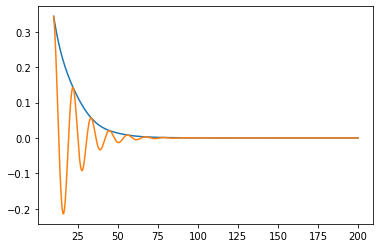

In [417]:
plt.figure()
plt.plot(t, np.abs(h32 + h22))
plt.plot(t, np.real(h32 + h22))
# plt.yscale('log')

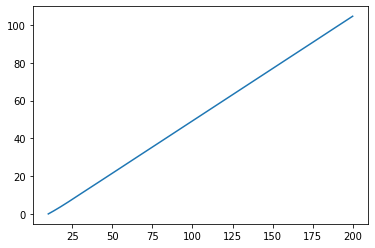

In [418]:
plt.figure()
plt.plot(t, np.unwrap(np.angle(h32 + h22)))